<a href="https://colab.research.google.com/github/Vopiyo/First-Repository/blob/main/Travel_Aggregator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scenario**

Travelling has significantly changed thanks to technology. In the earlier days, it was not easy to travel as booking journeys used to be a hassle, where people needed to contact travel agents, get prices and then do a lot of paperwork.
But, with the advent of online apps, it becomes easier to book tickets. However, one challenge is still there. Due to many available apps which offer bookings, there can be a lot of comparisons for getting the best price.
A new Indian start-up, "MyNextBooking” is an aggregator on top of the available top platforms (Yatra, MMT, Goibibo). It helps the user compare prices for their upcoming journeys on its platform and the customer is redirected to the desired platform after looking at the price.
However, they need to do a lot of analysis of the data which they have collected over a while.
As a newly hired analyst and proficiency in Python, your role is to help them perform an in- depth analysis.

**Objective: Please provide answers to the following questions:**

1) Find the number of distinct bookings, sessions, and searches from the given data sets.

2) How many sessions have more than one booking?

3) Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week?

4) For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.

5) For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

6) Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?

7) Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings data set, have the maximum correlation?

8) For each service, which is the most used device type for making bookings on the platform?

9) Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type.

10) Consider the following example:

12 customers performed a total of 100 searches but only a few of them performed 10 bookings in total.
Searches = 100 bookings = 10 customers = 12

The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above information/context, answer the following:

• What is the average oBSR for each month of the year?

• What is the average oBSR for each day of the week?

• Plot a time series of oBSR on all the given dates.

# **About the Data**

The data provided consists of the following two files:

**1) Bookings.csv**

• customer_id

• booking_id

• from_city

• from_country

• to_city

• to_country

• booking_time

• device_type_used

• INR_Amount

• service_name

• no_of_passengers

• days_to_departure

• distance_km

**2) Sessions.csv**

• session_id

• search_id

• search_time

• session_starting_time

• booking_id

# 1. Distinct Bookings, Sessions, and Searches
To find the number of distinct bookings, sessions, and searches from the datasets, I use Python with libraries like pandas as shown below:

In [ ]:
import pandas as pd

# Load the datasets
bookings = pd.read_csv('Bookings.csv')
sessions = pd.read_csv('Sessions.csv')

# Calculate distinct values
distinct_bookings = bookings['booking_id'].nunique()
distinct_sessions = sessions['session_id'].nunique()
distinct_searches = sessions['search_id'].nunique()

print(f"Distinct Bookings: {distinct_bookings}, Distinct Sessions: {distinct_sessions}, Distinct Searches: {distinct_searches}")

Distinct Bookings: 339, Distinct Sessions: 331, Distinct Searches: 1360


In [ ]:
bookings.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4


In [ ]:
sessions.head()

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN


# **2. Sessions with More Than One Booking**
To find how many sessions have more than one booking:

In [ ]:
# Count bookings per session
session_booking_counts = sessions['session_id'].value_counts()
multiple_booking_sessions = session_booking_counts[session_booking_counts > 1].count()

print(f"Sessions with more than one booking: {multiple_booking_sessions}")

Sessions with more than one booking: 237


# **3. Days of the Week with Highest Bookings**
To determine which days have the highest number of bookings and create a pie chart:

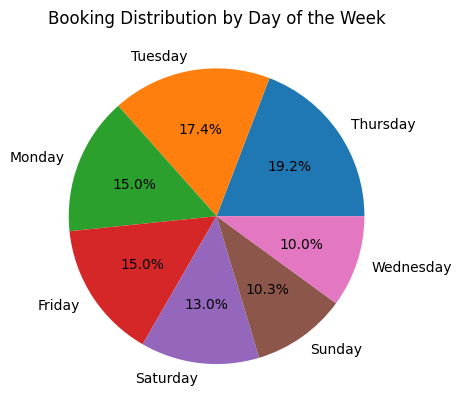

In [ ]:
# Convert booking_time to datetime and extract day of the week
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])
bookings['day_of_week'] = bookings['booking_time'].dt.day_name()

# Count bookings per day
bookings_per_day = bookings['day_of_week'].value_counts()

# Plotting
import matplotlib.pyplot as plt

plt.pie(bookings_per_day, labels=bookings_per_day.index, autopct='%1.1f%%')
plt.title('Booking Distribution by Day of the Week')
plt.show()

# **4. Total Bookings and Gross Booking Value by Service Name**
To display total bookings and Gross Booking Value for each service:

In [ ]:
service_summary = bookings.groupby('service_name').agg(
    total_bookings=('booking_id', 'count'),
    total_gross_value=('INR_Amount', 'sum')
).reset_index()

print(service_summary)

  service_name  total_bookings  total_gross_value
0      GOIBIBO             186         5897637.97
1          MMT              48          665669.08
2        YATRA             105         3378702.13


# **5. Most Booked Route for Customers with More Than One Booking**
To find the most booked route for customers with multiple bookings:

In [ ]:
customer_multiple_bookings = bookings[bookings['customer_id'].duplicated(keep=False)]
most_booked_route = customer_multiple_bookings.groupby(['from_city', 'to_city']).size().idxmax()

print(f"Most booked route: {most_booked_route}")

Most booked route: ('Gurgaon', 'Roissy-en-France')


# **6. Top 3 Departure Cities with At Least 5 Departures**
To identify top departure cities where customers book mostly in advance:

In [ ]:
departure_counts = bookings['from_city'].value_counts()
top_departure_cities = departure_counts[departure_counts >= 5].nlargest(3)

print(f"Top 3 departure cities: {top_departure_cities.index.tolist()}")

Top 3 departure cities: ['Gurgaon', 'Mumbai', 'Delhi']


# **7. Heatmap of Numerical Column Correlations**
To create a heatmap and find maximum correlation:

customer_id                       object
booking_id                        object
from_city                         object
from_country                      object
to_city                           object
to_country                        object
booking_time         datetime64[ns, UTC]
device_type_used                  object
INR_Amount                       float64
service_name                      object
no_of_passengers                 float64
days_to_departure                float64
distance_km                      float64
day_of_week                       object
dtype: object


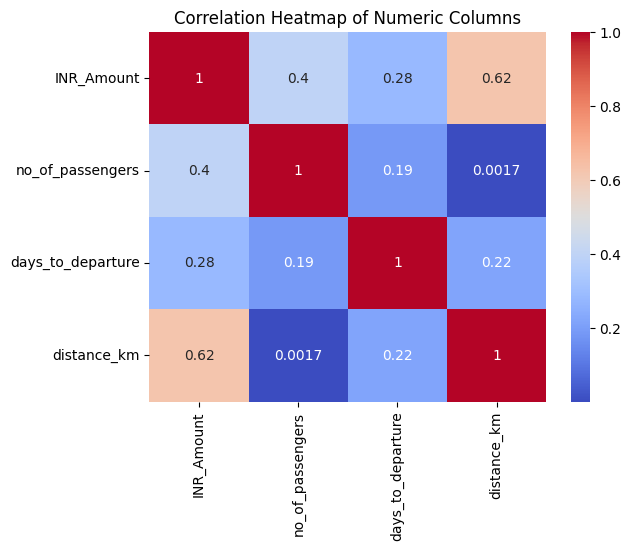

Maximum correlation pair: ('INR_Amount', 'INR_Amount')


In [ ]:
import seaborn as sns



# Check data types to identify non-numeric columns
print(bookings.dtypes)

# Select only numeric columns for correlation analysis
numeric_columns = bookings.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

# Finding the pair of numerical columns with maximum correlation
max_corr_pair = correlation_matrix.unstack().idxmax()
print(f"Maximum correlation pair: {max_corr_pair}")
#correlation_matrix = bookings.corr()
#sns.heatmap(correlation_matrix, annot=True)
#plt.show()

#max_corr_pair = correlation_matrix.unstack().idxmax()
#print(f"Maximum correlation pair: {max_corr_pair}")

# **8. Most Used Device Type for Each Service**
To determine the most used device type for each service:

In [ ]:
most_used_device = bookings.groupby('service_name')['device_type_used'].agg(lambda x: x.value_counts().idxmax()).reset_index()

print(most_used_device)

  service_name device_type_used
0      GOIBIBO              IOS
1          MMT          Desktop
2        YATRA          Desktop


# **9. Quarterly Trends for Device Types**
To plot quarterly trends for device types:

<ipython-input-11-c239beac7750>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings['quarter'] = bookings['booking_time'].dt.to_period('Q')


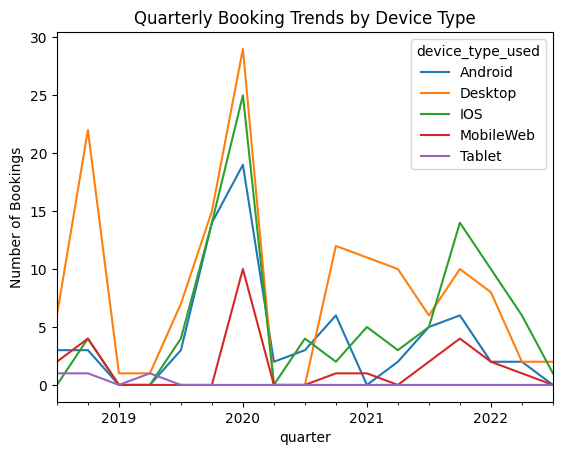

In [ ]:
bookings['quarter'] = bookings['booking_time'].dt.to_period('Q')
quarterly_trends = bookings.groupby(['quarter', 'device_type_used']).size().unstack(fill_value=0)

quarterly_trends.plot(kind='line')
plt.title('Quarterly Booking Trends by Device Type')
plt.ylabel('Number of Bookings')
plt.show()

# **10. Overall Booking to Search Ratio (oBSR)**
To calculate average oBSR for each month and day of the week and plot a time series:

0 invalid booking times
573 invalid search times
Overall Booking to Search Ratio (oBSR): 0.25
Average oBSR for each month:
month
2018-09    0.387097
2018-10    0.095238
2018-11    0.250000
2018-12    0.193548
2019-01    0.333333
2019-06    1.000000
2019-07    0.217391
2019-08    0.285714
2019-09    0.304348
2019-10    0.214286
2019-11    0.285714
2019-12    0.228070
2020-01    0.226027
2020-02    0.306452
2020-03    0.300000
2020-05         NaN
2020-06         NaN
2020-07         NaN
2020-08         NaN
2020-09         NaN
2020-10         NaN
2020-11         NaN
2020-12         NaN
2021-01         NaN
2021-02         NaN
2021-03         NaN
2021-04         NaN
2021-05         NaN
2021-06         NaN
2021-07         NaN
2021-08         NaN
2021-09         NaN
2021-10         NaN
2021-11         NaN
2021-12         NaN
2022-01         NaN
2022-02         NaN
2022-03         NaN
2022-04         NaN
2022-05         NaN
2022-06         NaN
2022-07         NaN
Freq: M, dtype: float64
Average

<ipython-input-15-3ecccf0e75f8>:19: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings['month'] = bookings['booking_time'].dt.to_period('M')
<ipython-input-15-3ecccf0e75f8>:20: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sessions['month'] = sessions['search_time'].dt.to_period('M')


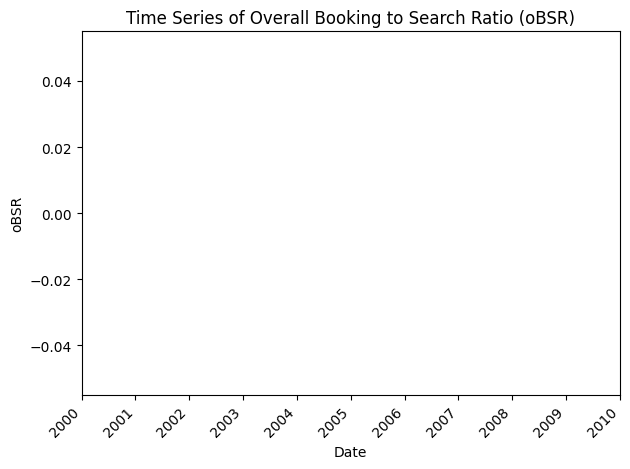

In [ ]:
# Ensure booking_time and search_time are in datetime format
# Convert booking_time and search_time to datetime
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'], errors='coerce')
sessions['search_time'] = pd.to_datetime(sessions['search_time'], errors='coerce')

# Check for any conversion issues
print(bookings['booking_time'].isnull().sum(), "invalid booking times")
print(sessions['search_time'].isnull().sum(), "invalid search times")

# Count total bookings and searches
total_bookings = bookings['booking_id'].nunique()
total_searches = sessions['search_id'].nunique()

# Calculate overall Booking to Search Ratio (oBSR)
oBSR = total_bookings / total_searches if total_searches > 0 else 0
print(f"Overall Booking to Search Ratio (oBSR): {oBSR:.2f}")

# Calculate monthly oBSR
bookings['month'] = bookings['booking_time'].dt.to_period('M')
sessions['month'] = sessions['search_time'].dt.to_period('M')

monthly_bookings = bookings.groupby('month')['booking_id'].nunique()
monthly_searches = sessions.groupby('month')['search_id'].nunique()

monthly_oBSR = monthly_bookings / monthly_searches
print("Average oBSR for each month:")
print(monthly_oBSR)

# Calculate daily oBSR
bookings['day'] = bookings['booking_time'].dt.day_name()
sessions['day'] = sessions['search_time'].dt.day_name()

daily_bookings = bookings.groupby('day')['booking_id'].nunique()
daily_searches = sessions.groupby('day')['search_id'].nunique()

daily_oBSR = daily_bookings / daily_searches
print("Average oBSR for each day of the week:")
print(daily_oBSR)

# Plotting time series of oBSR on all given dates
date_oBSR = bookings.groupby('booking_time').size() / sessions.groupby('search_time').size()
date_oBSR.plot(title='Time Series of Overall Booking to Search Ratio (oBSR)')
plt.xlabel('Date')
plt.ylabel('oBSR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()